# Faraz Ali
## fa06396@st.habib.edu.pk
### Classification

### Initialization

In [ ]:
import pandas as pd
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

## Classification

In [ ]:
df = pd.read_csv('CreditCardData.csv')

### Q1

In [ ]:
df.replace('?', np.NaN, inplace=True)
df.dropna(inplace=True)
df

,Male,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43,560,+
2,a,24.5,0.500,u,g,q,h,1.50,t,f,0,f,g,280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,260,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,200,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,200,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,280,750,-


### Q2

In [ ]:
df['Approved'] = df['Approved'].str.replace('-', '0')
df['Approved'] = df['Approved'].str.replace('+', '1')
df['Approved'] = df['Approved'].astype(int)
df['Approved']

<ipython-input-46-98cf1d6c925f>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Approved'] = df['Approved'].str.replace('+', '1')


0      1
1      1
2      1
3      1
4      1
      ..
685    0
686    0
687    0
688    0
689    0
Name: Approved, Length: 653, dtype: int64

### Q3

In [ ]:
non_numeric_cols = df.select_dtypes(exclude=['int', 'float']).columns.tolist()
non_numeric_cols

['Male',
 'Age',
 'Married',
 'BankCustomer',
 'EducationLevel',
 'Ethnicity',
 'PriorDefault',
 'Employed',
 'DriversLicense',
 'Citizen',
 'ZipCode']

In [ ]:
df['Age'] = df['Age'].astype(float)
df['ZipCode'] = df['ZipCode'].astype(float)

In [ ]:
non_numeric_cols = df.select_dtypes(exclude=['int', 'float']).columns.tolist()
df1 = pd.get_dummies(df, columns=[i for i in non_numeric_cols])
dTrain, dTest = train_test_split(df1, test_size=0.3, random_state=100)

### Q4

Covered in answer for Q3

### Q5

In [ ]:
X = df1.drop(['Approved'], axis=1)
Y = df1['Approved']
dt = tree.DecisionTreeClassifier(random_state=99)
xTrain, xTest, yTrain, yTest = train_test_split(X, Y, test_size=0.3, random_state=100)
modelTrain = dt.fit(xTrain, yTrain)
modelTrain.feature_importances_

array([0.05573891, 0.08281139, 0.02040212, 0.00671275, 0.06674618,
       0.06299288, 0.        , 0.01294875, 0.        , 0.        ,
       0.        , 0.        , 0.01546751, 0.00734207, 0.        ,
       0.0201675 , 0.00174273, 0.        , 0.00709034, 0.        ,
       0.00122405, 0.        , 0.01037337, 0.00667461, 0.00964958,
       0.        , 0.        , 0.00580144, 0.02535719, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.51199466, 0.        , 0.        ,
       0.05106232, 0.01769964, 0.        , 0.        , 0.        ,
       0.        ])

In [ ]:
tPred = modelTrain.predict(xTrain)
tPred

array([1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,

In [ ]:
tAccuracy = (accuracy_score(tPred, yTrain) * 100)
tAccuracy

100.0

In [ ]:
tPred = modelTrain.predict(xTest)
tPred

array([1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1])

In [ ]:
testAccuracy = (accuracy_score(tPred, yTest) * 100)
testAccuracy

83.16326530612244

In [ ]:
treeRepr = tree.export_text(modelTrain)
print(treeRepr)

|--- feature_37 <= 0.50
|   |--- feature_40 <= 0.50
|   |   |--- feature_4 <= 75.00
|   |   |   |--- feature_1 <= 22.04
|   |   |   |   |--- feature_5 <= 100.00
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_5 >  100.00
|   |   |   |   |   |--- feature_5 <= 262.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_5 >  262.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |--- feature_1 >  22.04
|   |   |   |   |--- class: 0
|   |   |--- feature_4 >  75.00
|   |   |   |--- feature_5 <= 125.00
|   |   |   |   |--- feature_0 <= 37.46
|   |   |   |   |   |--- feature_0 <= 33.29
|   |   |   |   |   |   |--- feature_1 <= 10.75
|   |   |   |   |   |   |   |--- feature_1 <= 2.52
|   |   |   |   |   |   |   |   |--- feature_15 <= 0.50
|   |   |   |   |   |   |   |   |   |--- feature_18 <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- feature_24 <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |   |-

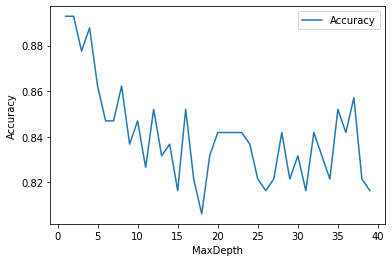

In [ ]:
max_depth = []
acc = []
for i in range(1,40):
    dtree = tree.DecisionTreeClassifier(criterion='gini',max_depth=i)
    dtree.fit(xTrain, yTrain)
    pred = dtree.predict(xTest)
    acc.append(accuracy_score(yTest, pred))
    max_depth.append(i)
d = pd.DataFrame({
    'Accuracy':pd.Series(acc),
    'MaxDepth':pd.Series(max_depth)
     })
plt.plot('MaxDepth','Accuracy', data=d)
plt.xlabel('MaxDepth')
plt.ylabel('Accuracy')
plt.legend()

In [ ]:
newTree = tree.DecisionTreeClassifier(criterion = 'gini', max_depth = 4)
newModel = newTree.fit(xTrain, yTrain)
train_pred = newModel.predict(xTrain)
acc = accuracy_score(train_pred, yTrain) * 100
test_pred = newModel.predict(xTest)
testAcc = (accuracy_score(test_pred, yTest) * 100)
print(f'Training Accuracy = {acc} and Testing Accuracy = {testAcc}, differnece = {acc-testAcc}')

Training Accuracy = 89.93435448577681 and Testing Accuracy = 88.77551020408163, differnece = 1.1588442816951812


**Analysis**

**Initially:**

Starting with the initial Training and Testing that I performed, the accuracy of the Training performed was excpetional at 100%, however, at the cost of testing accuracy. The testing accuracy when calculated came out to be ≈ 83%. Having such great difference in the training and testing accuracy suggested that the tree is very complex and of hig depth. When illustrated this came out to be true. I then moved onto creating a graph to check how increasing the depth of my decision tree affects the accuracy of the model. The overall trend of the graph produced suggested that as the depth increases and the tree gets more complex, the accuracy tends to drop. I then decided to prune the tree and just select the maxDepth of 4 (as apparently, the maximum accuracy was seen around 4 in the graph).

**After Pruning:**

After the tree was pruned, even though the accuracy of the training model dropped to ≈ 90%, we got a better model as the difference between the accuracy of the training and the testing was only around 1.15% which is far better than what we had initially. This suggests that pruning helps get rid of overfitting and only takes into consideration the most accurate and important features for the model.


### Q6

In [ ]:
numTrees = [i for i in range(1,200,9)]
for i in numTrees:
    forest = RandomForestClassifier(n_estimators=i, random_state=99)
    forestModel = forest.fit(xTrain, yTrain)
    train_pred = forestModel.predict(xTrain)
    acc = accuracy_score(train_pred, yTrain) * 100
    testPred = forestModel.predict(xTest)
    testAccuracy = accuracy_score(testPred, yTest) * 100
    print(f'nEstimator = {i}, Training Accuracy = {acc}, Testing Accuracy = {testAccuracy}, difference = {acc-testAccuracy}')

nEstimator = 1, Training Accuracy = 93.21663019693655, Testing Accuracy = 86.22448979591837, difference = 6.992140401018176
nEstimator = 10, Training Accuracy = 98.6870897155361, Testing Accuracy = 88.77551020408163, difference = 9.911579511454477
nEstimator = 19, Training Accuracy = 99.78118161925602, Testing Accuracy = 91.83673469387756, difference = 7.9444469253784575
nEstimator = 28, Training Accuracy = 100.0, Testing Accuracy = 91.3265306122449, difference = 8.673469387755105
nEstimator = 37, Training Accuracy = 100.0, Testing Accuracy = 90.3061224489796, difference = 9.693877551020407
nEstimator = 46, Training Accuracy = 100.0, Testing Accuracy = 91.3265306122449, difference = 8.673469387755105
nEstimator = 55, Training Accuracy = 100.0, Testing Accuracy = 91.83673469387756, difference = 8.16326530612244
nEstimator = 64, Training Accuracy = 100.0, Testing Accuracy = 90.3061224489796, difference = 9.693877551020407
nEstimator = 73, Training Accuracy = 100.0, Testing Accuracy = 91.

In [ ]:
forest = RandomForestClassifier(n_estimators=19, random_state=99)
forestModel = forest.fit(xTrain, yTrain)
train_pred = forestModel.predict(xTrain)
testPred = forestModel.predict(xTest)

Text(0.5, 0, 'Random Forest Feature Importance')

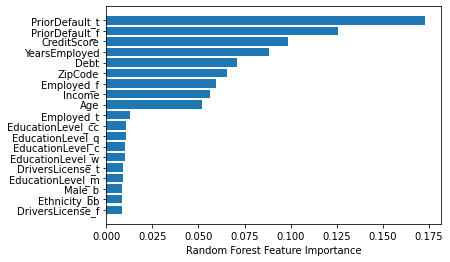

In [ ]:
sorted_idx = forestModel.feature_importances_.argsort()
plt.barh(list(X.columns[sorted_idx])[27:47], forestModel.feature_importances_[sorted_idx][27:47])
plt.xlabel("Random Forest Feature Importance")

**Analysis**

**Choosing nEstimators:**

I tried to create a model using RandomForest with multiple nEstimator values and compared the accuracy of each model. For the best nEstimator value I had two candidates, n = 1 and n = 19. While 1 had the lowest difference in the accuracies of around ≈ 7% only, I decided to go with n = 19. This is because at 19, I was able to increase the Training accuracy by 6% at the cost of just ≈ 1% more margin of difference between Training and Testing models. After 19, the values seems to get saturated and not much difference is achieved. 

**Understanding Important Features:**

To understand which features had the highest importance for the model, I sorted the features list according to importance and then plotted a graph of top 20 features. This was done to get a better view at the results as the total features were 46. Visualising them altogether was a difficult task. This lead to identifying that the most important features for this model was PriorDefualt values, CreditScore, YearsEmployed and Debt.

### Q7

In [ ]:
treeScores = cross_val_score(newModel, X, Y, cv=5)
forestScores = cross_val_score(forestModel, X, Y, cv=5)
print(f'Average CV score for Decision Tree = {treeScores.mean()} and Average CV for Random Forest = {forestScores.mean()}')

Average CV score for Decision Tree = 0.8207633587786258 and Average CV for Random Forest = 0.8529888432178507


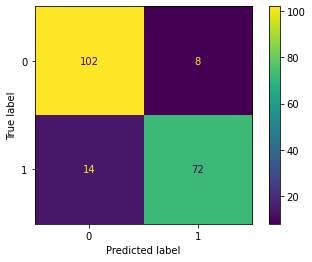

In [ ]:
trainingMatrix = confusion_matrix(yTrain, train_pred)
testingMatrix = confusion_matrix(yTest, test_pred)
cp = ConfusionMatrixDisplay(testingMatrix, display_labels = forestModel.classes_)
cp.plot()

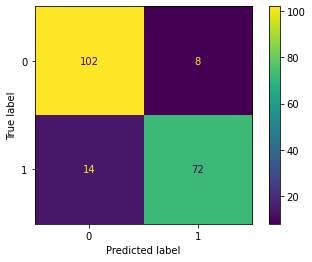

In [ ]:
train_pred = newModel.predict(xTrain)
test_pred = newModel.predict(xTest)
trainingMatrix = confusion_matrix(yTrain, train_pred)
testingMatrix = confusion_matrix(yTest, test_pred)
cp = ConfusionMatrixDisplay(testingMatrix, display_labels = newModel.classes_)
cp.plot()

**Comparison:**

Both models work effectively as classification models. However, the CV scores of the two suggests that Random Forest is slightly better than Decision Tree. I also feel this because the decision tree initially didn't worked effectively rather was too overfitted. It required to prune the tree and the new, pruned, model has its accuracy less than the RandomForest Model. The Random forest didn't required any such tuning of the model and gave better accuracy. The Confusion matrix of the two however, suggests that both manages to work effectively and that both have similar values when it comes to identifying false negatives and positives. This may be the case because the average CV scores are pretty much similar with only the difference of around 3%.

The random forests are better than the decision trees since decision trees testing accuracy was coming to 90 % only after massive pruning and comprimising on the training accuracy however the random forests are able to capture the same effect without the need for pruning and other such methodologies and we can increase testing accuracy by just increasing the number of trees without comprimising on the training accuracy.

## Recommendation

In [ ]:
data = pd.read_csv('mcdonalds.csv')

### Q1

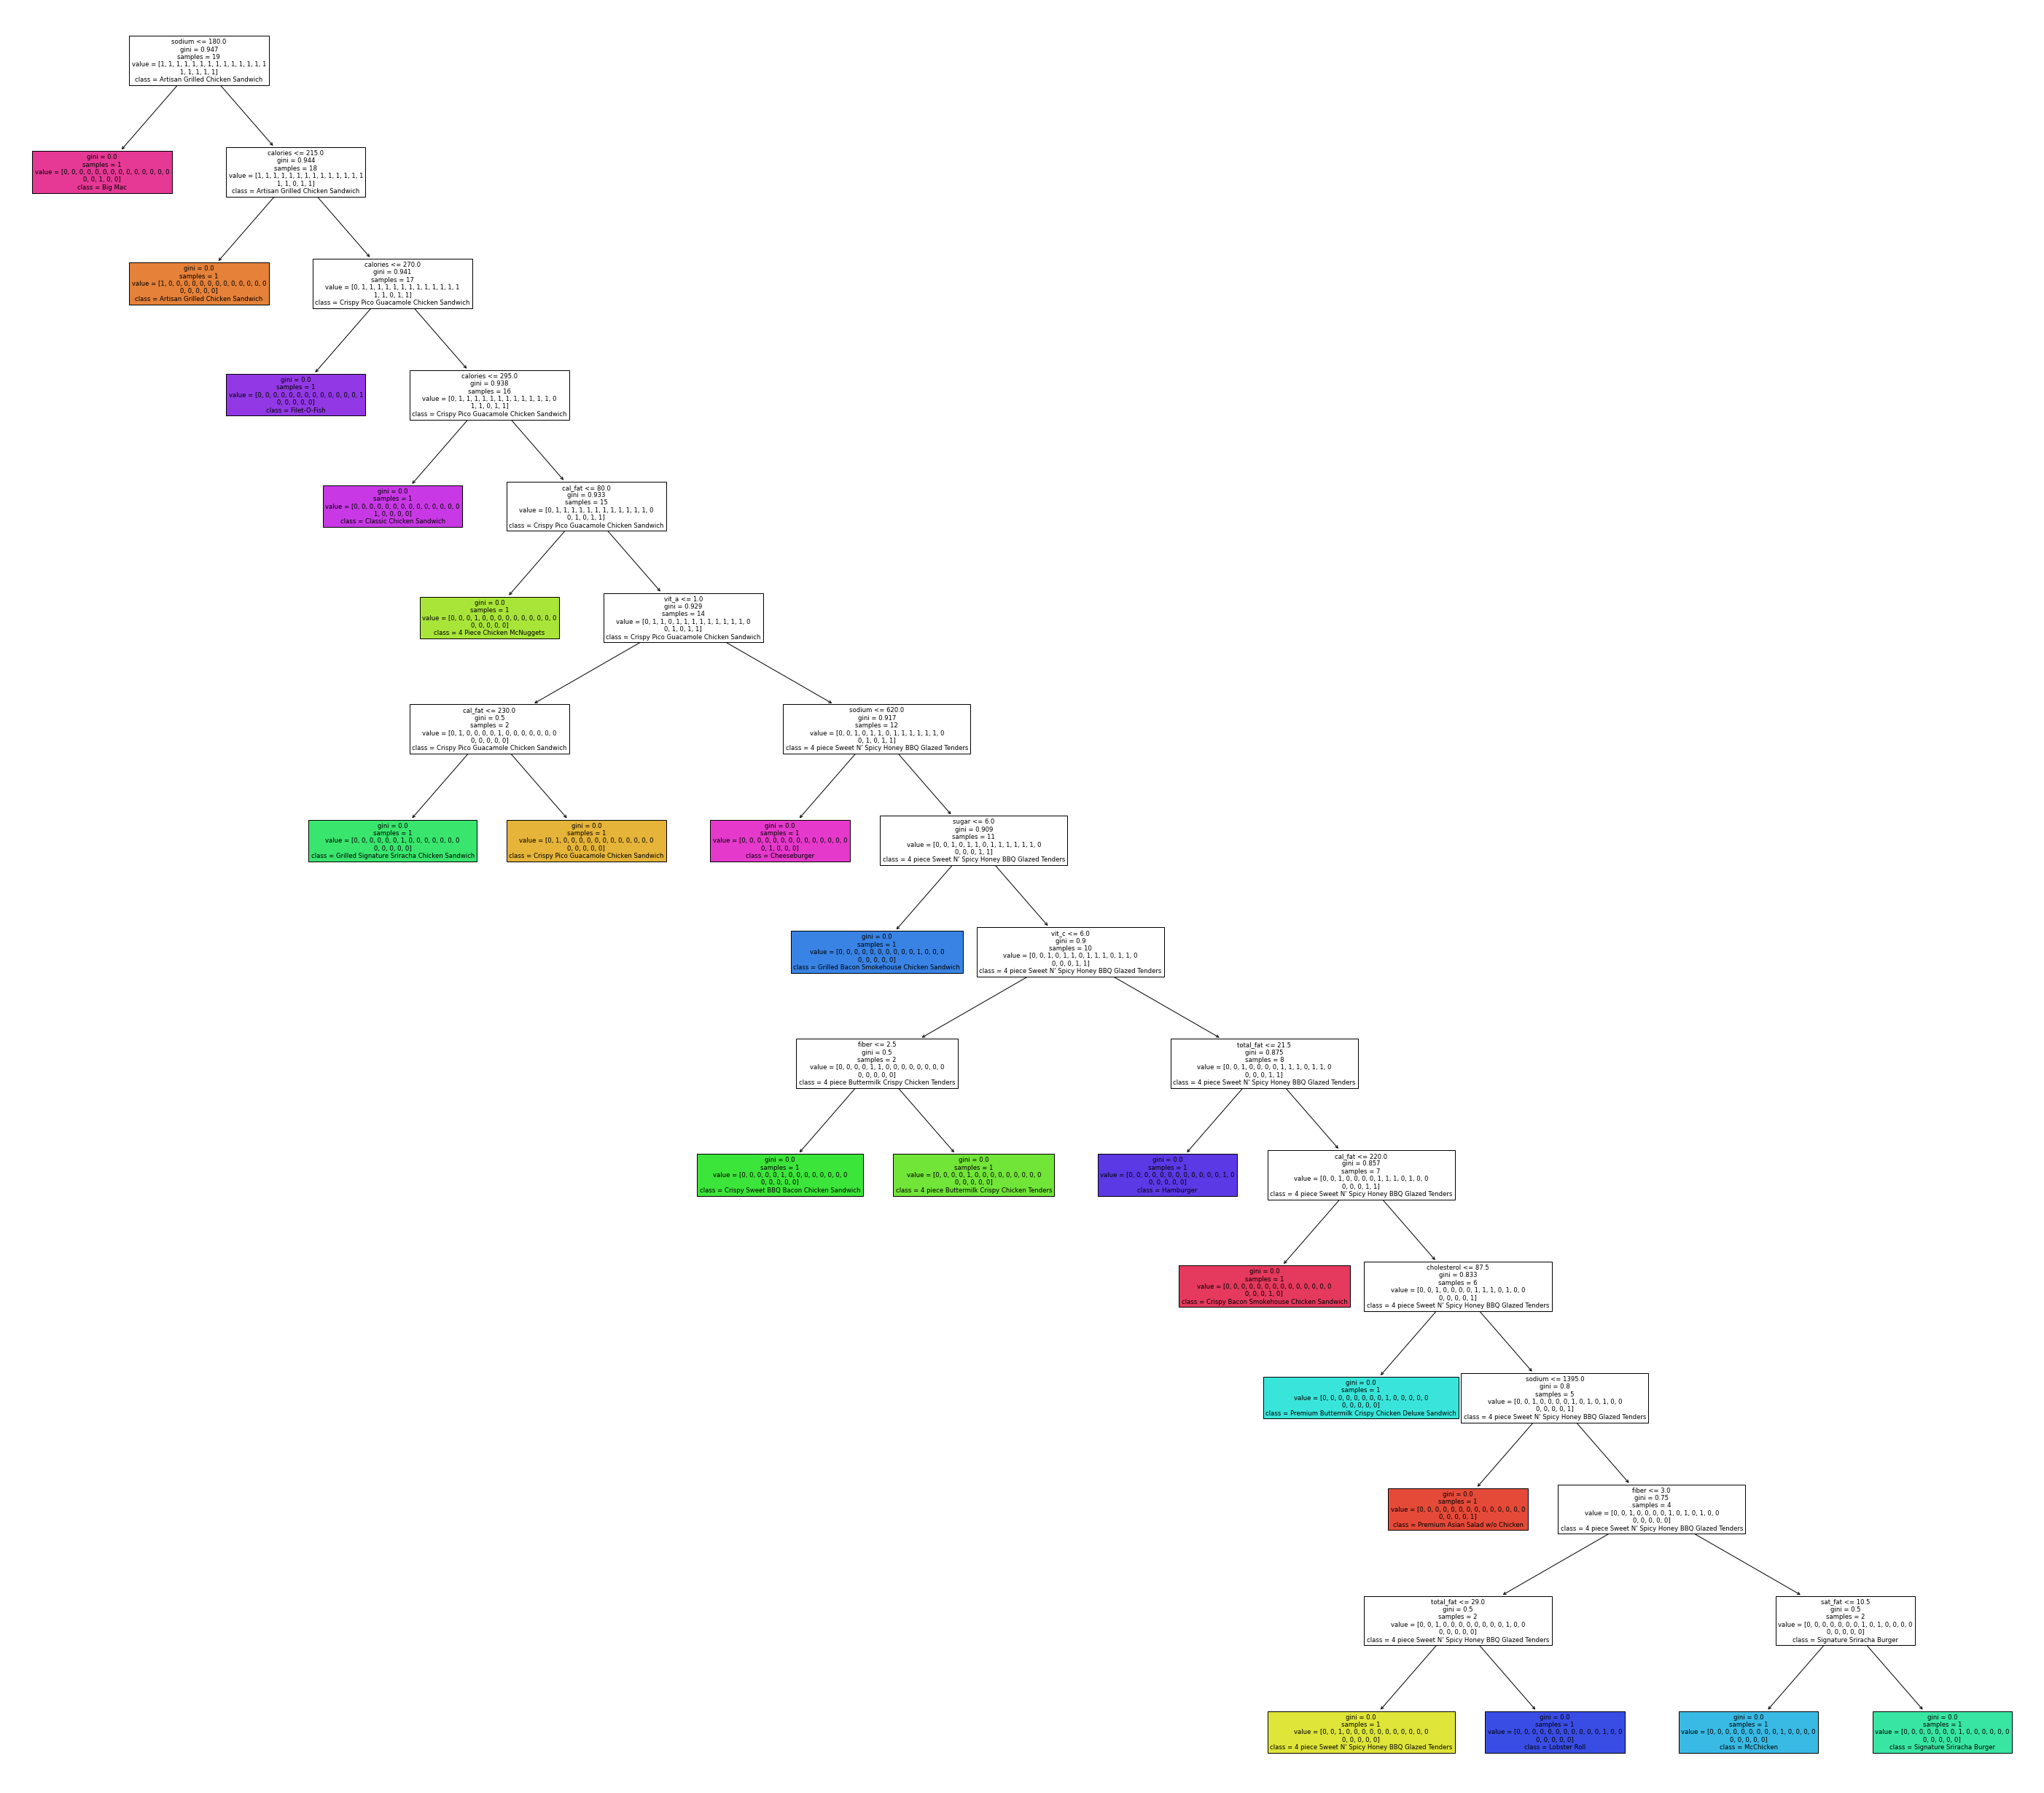

In [ ]:
data = data.drop('restaurant', axis = 1)
X = data.drop("item", axis = 1)
Y = data['item']
recommendationTree = tree.DecisionTreeClassifier(criterion='gini', min_samples_split=2, min_samples_leaf=1, random_state=99)
recommendationModel = recommendationTree.fit(X, Y)
treeRepr = tree.export_text(recommendationModel)
fig = plt.figure(figsize=(50, 45))
_ = tree.plot_tree(recommendationModel,
                   feature_names=list(X.columns),
                   class_names=Y.value_counts().index,
                   filled=True)

In [ ]:
fig.savefig("decistion_tree.png")

According to the recommendation system using the decision tree, the three similar items I found are as follows:


1.   Crispy Sweet BBQ Bacon Chicken Sandwich
2.   4 piece Buttermilk Crispy Chicken Tenders
3.   Hamburger

Since these three items are closer together in the tree, they are similar to each other. It is interesting to see how, even though these and many more items such as Lobster Roll and McChicken are so different in perception but when seen through the lens of this diagram, they seem to be similar.

